# Exploring Dataset_v0

In [12]:
import matplotlib.pyplot as plt                      # create visualizations
import datetime                                      # datetime manipulation
import glob                                          # unix pathname expansion
import colorcet as cc                                # colormaps for datashader 
import xarray as xr                                  # efficent ND arrays manipulation
import rasterio as rs                                # raster and geospatial data proc.
import rioxarray                                     # rasterio xarray extension
import pickle                                        # load/save pickle datasets
import os                                            # miscellaneous OS interfaces
from pathlib import Path                             #                                      #
import shutil
import re
import numpy as np
import glob
import colorcet as cc                                # colormaps for datashader 
from matplotlib.colors import LinearSegmentedColormap# create custom color maps

colors = ["red", "darkorange", "yellow", "palegreen", "springgreen", "cyan", "blue"]
custom_cmap_w = LinearSegmentedColormap.from_list("mycmap", colors)

## Intro

Soil Moisture dataset created with OPTRAM outputs

## File structure

In [2]:
BASE_DIR = "./dataset_v0/"

In [3]:
! du -h ./dataset_v0/

858M	./dataset_v0/G/masked
1,3G	./dataset_v0/G
858M	./dataset_v0/NDVI/masked
1,2G	./dataset_v0/NDVI
858M	./dataset_v0/SWIR/masked
1,3G	./dataset_v0/SWIR
858M	./dataset_v0/W/masked
1,7G	./dataset_v0/W
8,0K	./dataset_v0/.ipynb_checkpoints
858M	./dataset_v0/B/masked
1,3G	./dataset_v0/B
1,7G	./dataset_v0/THETA/masked
3,4G	./dataset_v0/THETA
858M	./dataset_v0/R/masked
1,3G	./dataset_v0/R
858M	./dataset_v0/NIR/masked
1,3G	./dataset_v0/NIR
858M	./dataset_v0/SCL
14G	./dataset_v0/


All bands (except SCL) have the `masked` subfolders: 

In [4]:
BASE_DIR_R     = os.path.join(BASE_DIR,"R/masked")
BASE_DIR_G     = os.path.join(BASE_DIR,"G/masked")
BASE_DIR_B     = os.path.join(BASE_DIR,"B/masked")
BASE_DIR_NIR   = os.path.join(BASE_DIR,"NIR/masked")
BASE_DIR_NDVI  = os.path.join(BASE_DIR,"NDVI/masked")
BASE_DIR_SWIR  = os.path.join(BASE_DIR,"SWIR/masked")
BASE_DIR_W     = os.path.join(BASE_DIR,"W/masked")
BASE_DIR_THETA = os.path.join(BASE_DIR,"THETA/masked")

band_dirs = [
 BASE_DIR_R,    
 BASE_DIR_G,   
 BASE_DIR_B,
 BASE_DIR_NIR,  
 BASE_DIR_NDVI,
 BASE_DIR_SWIR ,
 BASE_DIR_W , 
 BASE_DIR_THETA
]

bands_dict = dict(zip(
    ["R","G","B","NIR","NDVI","SWIR","W","THETA"],
band_dirs))

bands_dict

{'R': './dataset_v0/R/masked',
 'G': './dataset_v0/G/masked',
 'B': './dataset_v0/B/masked',
 'NIR': './dataset_v0/NIR/masked',
 'NDVI': './dataset_v0/NDVI/masked',
 'SWIR': './dataset_v0/SWIR/masked',
 'W': './dataset_v0/W/masked',
 'THETA': './dataset_v0/THETA/masked'}

## Loading images

In [5]:

dir_W    = bands_dict["W"]
dir_THETA = bands_dict["THETA"]


W_files = [f for f in os.listdir(dir_W) if os.path.isfile(os.path.join(dir_W, f))]
THETA_files = [f for f in os.listdir(dir_THETA) if os.path.isfile(os.path.join(dir_THETA, f))]

W_files.sort()
THETA_files.sort()

In [6]:
W_files[:10]

['S2A2A_20190105_041_Walnut-Gulch_W.tif',
 'S2A2A_20190125_041_Walnut-Gulch_W.tif',
 'S2A2A_20190204_041_Walnut-Gulch_W.tif',
 'S2A2A_20190214_041_Walnut-Gulch_W.tif',
 'S2A2A_20190224_041_Walnut-Gulch_W.tif',
 'S2A2A_20190306_041_Walnut-Gulch_W.tif',
 'S2A2A_20190316_041_Walnut-Gulch_W.tif',
 'S2A2A_20190326_041_Walnut-Gulch_W.tif',
 'S2A2A_20190405_041_Walnut-Gulch_W.tif',
 'S2A2A_20190415_041_Walnut-Gulch_W.tif']

## Visualize


[]

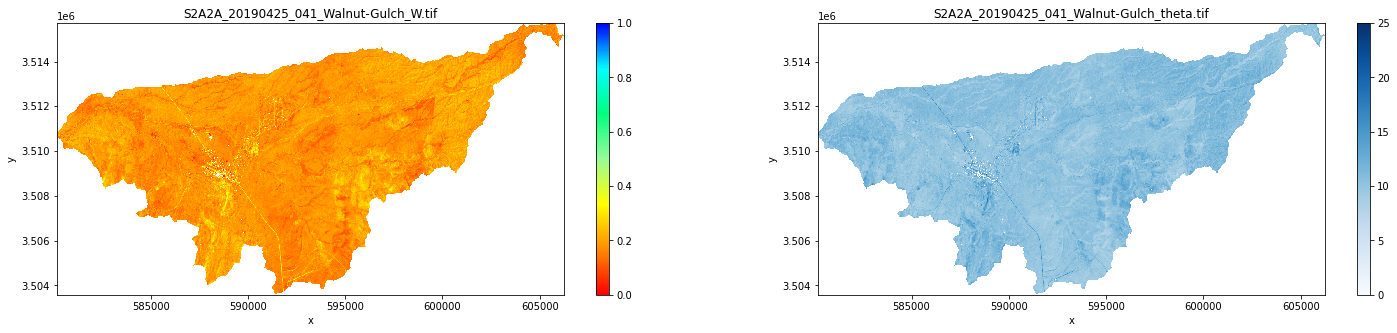

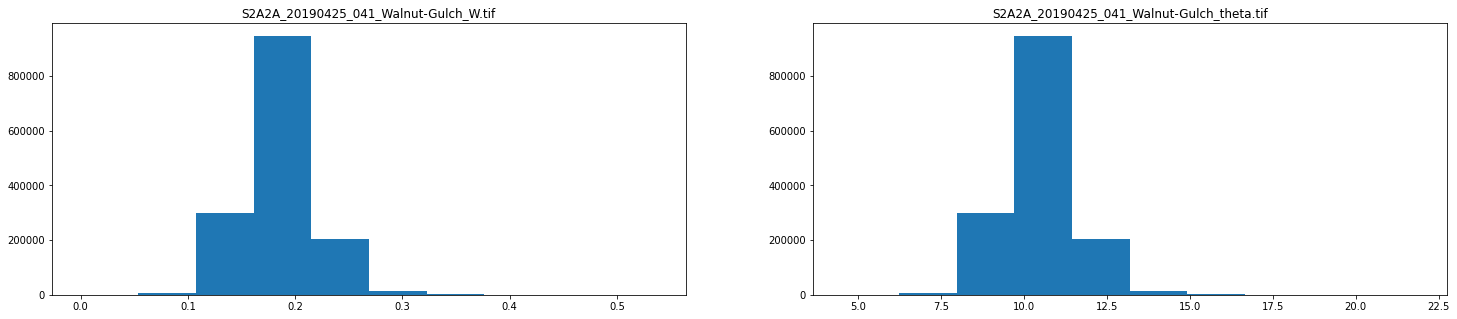

In [7]:
file_idx = 10

W     = rioxarray.open_rasterio(os.path.join(dir_W, W_files[file_idx]), masked=True)
THETA = rioxarray.open_rasterio(os.path.join(dir_THETA, THETA_files[file_idx]), masked=True)

fig, axs = plt.subplots(1,2, figsize = (25,5))
W.plot(ax = axs[0], cmap = custom_cmap_w,  vmin = 0, vmax = 1)
THETA.plot(ax = axs[1], cmap = "Blues", vmin = 0, vmax = 25)
axs[0].title.set_text(W_files[file_idx])
axs[1].title.set_text(THETA_files[file_idx])


fig, axs = plt.subplots(1,2, figsize = (25,5))
W.plot.hist(ax = axs[0])
THETA.plot.hist(ax = axs[1])
axs[0].title.set_text(W_files[file_idx])
axs[1].title.set_text(THETA_files[file_idx])
plt.plot()

## ACCESS DATA

In [8]:
W.data

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

In [9]:
np.nanmean(W.data)

0.18533124

## SUBSET

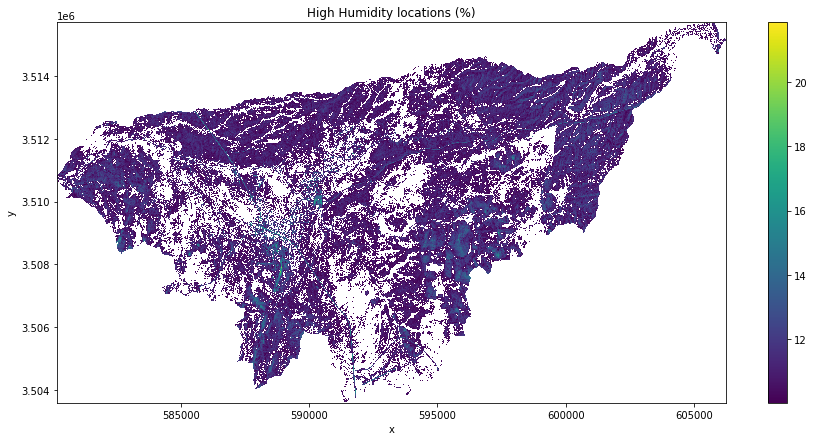

In [10]:
fig, axs = plt.subplots(figsize = (15,7))
THETA.where(THETA>10).plot()
axs.title.set_text("High Humidity locations (%)")